<a href="https://colab.research.google.com/github/LVaditya/Car_price_project/blob/main/cars_classfn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df= pd.read_csv("cars_class.csv")

In [ ]:
df.info() #to get an idea about types of feature and finding if any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [ ]:
df.describe()  # to get the distribution of features. min and max values give the range of values in each feature
                # also an idea of whether a scaling is needed 

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,360.000000,93.435327,44.851182,81.723227,168.579972,61.847010,8.625869,168.137691,41.075104,20.531293,148.030598,188.168289,436.215577,174.726008,72.682893,6.343533,12.394993,188.798331,195.407510,1.470097
std,207.701709,8.111406,6.150286,15.528208,33.809172,8.259136,4.916908,32.937591,7.764459,2.560969,14.560092,31.235395,174.964977,32.149568,7.542055,4.856169,8.742511,6.048522,7.235166,1.126477
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,180.500000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,360.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,539.500000,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,719.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


In [ ]:
df.head(10)  # all values are integers and id value is ordered number. it doesn't contribute to the analysis, hence we can drop this column

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2
5,6,95,46,76,162,66,11,162,42,20,155,175,381,172,74,8,4,184,193,3
6,7,97,35,66,151,64,8,128,52,18,129,148,246,112,66,6,2,195,200,3
7,8,96,37,74,199,74,5,165,39,20,128,188,419,136,72,1,3,196,200,0
8,9,107,55,98,199,59,7,240,27,26,168,258,866,245,80,3,1,186,184,0
9,10,86,38,89,176,59,9,169,39,20,132,190,428,148,67,7,33,193,202,1


In [ ]:
df["Class"].value_counts()    # class is the target vector. there are 4 classes and values are almost balanced

0    189
1    180
3    177
2    173
Name: Class, dtype: int64

<AxesSubplot:>

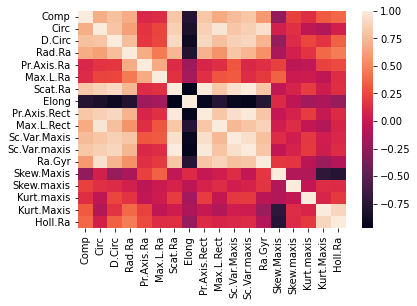

In [ ]:
sns.heatmap(X.corr())   #plotting correlation of features. we can see a higher correlation 
                        #between features (circ and Max.L.Rect)also between(circ and Ra.Gyr) 
                        #there might be a need for feature reduction

Converting whole data into X and y

In [ ]:
y=df["Class"]           #target vector

In [ ]:
X=df.drop(['ID','Class'],axis=1)      #feature matrix

Splitting X and y into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [ ]:
col_1 = X_test.columns        #feature names saved as col_1 for future use

In [ ]:
X_train.reset_index(drop = True, inplace = True)

In [ ]:
y_train.reset_index(drop = True, inplace = True)

In [ ]:
y_train[415]

3

<AxesSubplot:>

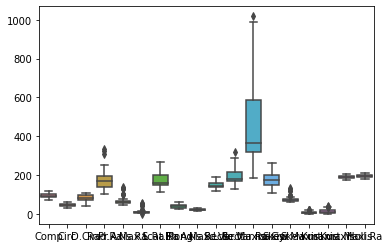

In [ ]:
#To compare the distribution of various features and compare them using boxplot
sns.boxplot(data=X_train)

#boxplot result shows a need of scaling the data

Applying scaling to features

In [ ]:
#applying standard scaling to the features
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
SS= StandardScaler()
X_std=SS.fit_transform(X_train)

<AxesSubplot:>

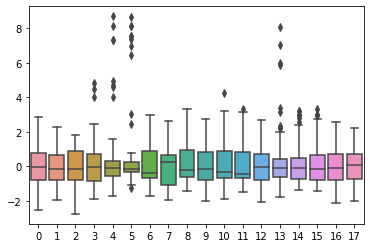

In [ ]:
sns.boxplot(data= X_std)        #boxplot after scaling

In [ ]:
#Scaling applied on test data
X_std_test = SS.transform(X_test)

In [ ]:
X_new=X_std
X_test_new = X_std_test

#Training Model on scaled data with default parameters.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lrc=LogisticRegression()
knn= KNeighborsClassifier()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()

In [ ]:
lrc.fit(X_new,y_train)
knn.fit(X_new,y_train)
dt.fit(X_new,y_train)
rfc.fit(X_new,y_train)
gbc.fit(X_new,y_train)

GradientBoostingClassifier()

In [ ]:
lrc_train_score=lrc.score(X_new,y_train)
knn_train_score=knn.score(X_new,y_train)
dt_train_score=dt.score(X_new,y_train)
rfc_train_score=rfc.score(X_new,y_train)
gbc_train_score=gbc.score(X_new,y_train)

In [ ]:
lrc_test_score=lrc.score(X_test_new,y_test)
knn_test_score=knn.score(X_test_new,y_test)
dt_test_score=dt.score(X_test_new,y_test)
rfc_test_score=rfc.score(X_test_new,y_test)
gbc_test_score=gbc.score(X_test_new,y_test)

In [ ]:
print("lrc: ",lrc_train_score,lrc_test_score)
print("knn: ",knn_train_score,knn_test_score)
print("dt: ",dt_train_score,dt_test_score)
print("rfc: ",rfc_train_score,rfc_test_score)
print("gbc: ",gbc_train_score,gbc_test_score)

lrc:  0.8139130434782609 0.7986111111111112
knn:  0.8226086956521739 0.7361111111111112
dt:  1.0 0.7708333333333334
rfc:  1.0 0.7847222222222222
gbc:  0.9947826086956522 0.7986111111111112


In [ ]:
y_pred_lrc=lrc.predict(X_test_new)
y_pred_knn=knn.predict(X_test_new)
y_pred_dt=dt.predict(X_test_new)
y_pred_rfc=rfc.predict(X_test_new)
y_pred_gbc=gbc.predict(X_test_new)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score

In [ ]:
#logistic regression
print("MSE:",mean_squared_error(y_test,y_pred_lrc))
print("f1_score:",f1_score(y_test,y_pred_lrc, average= 'micro'))

MSE: 0.4097222222222222
f1_score: 0.7986111111111112


In [ ]:
#knn
print("MSE:",mean_squared_error(y_test,y_pred_knn))
print("f1_score:",f1_score(y_test,y_pred_knn, average= 'micro'))

MSE: 0.7152777777777778
f1_score: 0.7361111111111113


In [ ]:
#decision tree
print("MSE:",mean_squared_error(y_test,y_pred_dt))
print("f1_score:",f1_score(y_test,y_pred_dt, average= 'micro'))

MSE: 0.5347222222222222
f1_score: 0.7569444444444444


In [ ]:
#Random forest
print("MSE:",mean_squared_error(y_test,y_pred_rfc))
print("f1_score:",f1_score(y_test,y_pred_rfc, average= 'micro'))

MSE: 0.5555555555555556
f1_score: 0.7708333333333333


In [ ]:
#Gradient Boosting
print("MSE:",mean_squared_error(y_test,y_pred_gbc))
print("f1_score:",f1_score(y_test,y_pred_knn, average= 'micro'))

MSE: 0.3472222222222222
f1_score: 0.7361111111111113


With default values of parameter we can see that there is a good result also the best result is for **logistic regression** since it has the least Squared error**:0.40** and best f1_score: **0.798**.

#Confusion Matrix
plotting confusion matrix for various models

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_lrc=confusion_matrix(y_test,y_pred_lrc)
cm_knn=confusion_matrix(y_test,y_pred_knn)
cm_dt=confusion_matrix(y_test,y_pred_dt)
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
cm_gbc=confusion_matrix(y_test,y_pred_gbc)

<AxesSubplot:>

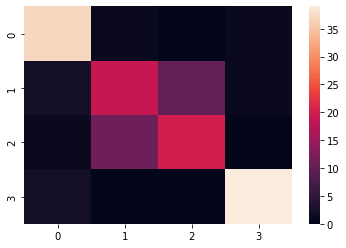

In [ ]:
sns.heatmap(cm_lrc)

<AxesSubplot:>

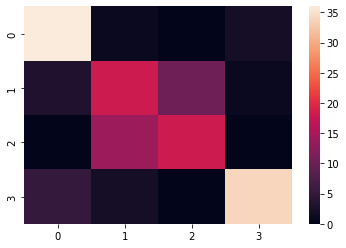

In [ ]:
sns.heatmap(cm_knn)

<AxesSubplot:>

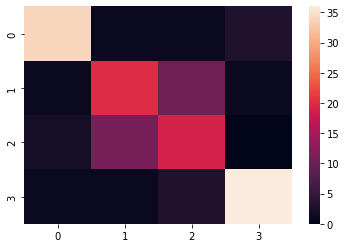

In [ ]:
sns.heatmap(cm_dt)

<AxesSubplot:>

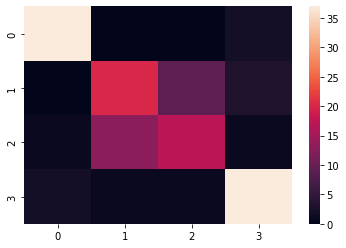

In [ ]:
sns.heatmap(cm_rfc)

<AxesSubplot:>

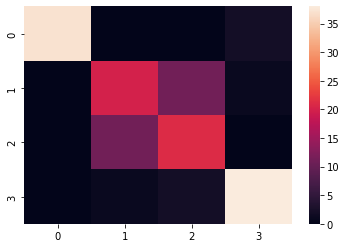

In [ ]:
sns.heatmap(cm_gbc)

# Removing Outliers and applying RFE

In [ ]:
X_train_1=pd.DataFrame(X_std,columns=col_1)

In [ ]:
col_1

Index(['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra',
       'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis',
       'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis',
       'Holl.Ra'],
      dtype='object')

In [ ]:
X_test_1=pd.DataFrame(X_std_test,columns=col_1)

In [ ]:
np.where(X_train_1['Max.L.Ra']>4)

(array([ 43,  74, 120, 174, 284, 344, 415, 516]),)

In [ ]:
X_train_1.drop([43,  74, 120, 174, 284, 344, 415, 516],axis = 0, inplace = True)

In [ ]:
y_train.drop([43,  74, 120, 174, 284, 344, 415, 516],axis = 0, inplace = True)

In [ ]:
X_new=X_train_1
X_test_new = X_test_1

<AxesSubplot:>

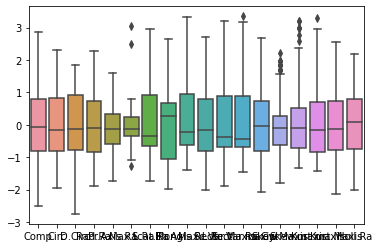

In [ ]:
#boxplot after outlier removal
sns.boxplot(data = X_train_1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lrc=LogisticRegression()
knn= KNeighborsClassifier()
dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()

In [ ]:
lrc.fit(X_train_1,y_train)
knn.fit(X_train_1,y_train)
dt.fit(X_train_1,y_train)
rfc.fit(X_train_1,y_train)
gbc.fit(X_train_1,y_train)

GradientBoostingClassifier()

In [ ]:
lrc_test_score=lrc.score(X_test_1,y_test)
knn_test_score=knn.score(X_test_1,y_test)
dt_test_score=dt.score(X_test_1,y_test)
rfc_test_score=rfc.score(X_test_1,y_test)
gbc_test_score=gbc.score(X_test_1,y_test)

In [ ]:
lrc_train_score=lrc.score(X_train_1,y_train)
knn_train_score=knn.score(X_train_1,y_train)
dt_train_score=dt.score(X_train_1,y_train)
rfc_train_score=rfc.score(X_train_1,y_train)
gbc_train_score=gbc.score(X_train_1,y_train)

In [ ]:
print("lrc: ",lrc_train_score,lrc_test_score)
print("knn: ",knn_train_score,knn_test_score)
print("dt: ",dt_train_score,dt_test_score)
print("rfc: ",rfc_train_score,rfc_test_score)
print("gbc: ",gbc_train_score,gbc_test_score)

lrc:  0.8130511463844797 0.7916666666666666
knn:  0.7777777777777778 0.7430555555555556
dt:  0.9470899470899471 0.7708333333333334
rfc:  1.0 0.7847222222222222
gbc:  0.8941798941798942 0.7569444444444444


#Training Model after outlier removal

*   KNN, Decision Tree, SVC,Random Forest, Gradient Boosting
*   Applying Cross Validation Techniques




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#applying some parameters to see the variation in results
lrc=LogisticRegression(multi_class='multinomial', solver='lbfgs')
knn= KNeighborsClassifier(n_neighbors=10, p=1)
dt=DecisionTreeClassifier(max_depth=10)
rfc=RandomForestClassifier(n_estimators=250, max_depth= 10, max_features='log2', random_state= 0)
gbc=GradientBoostingClassifier(n_estimators= 250,subsample=1, learning_rate = 0.01, random_state=0)

In [ ]:
lrc.fit(X_new,y_train)
knn.fit(X_new,y_train)
dt.fit(X_new,y_train)
rfc.fit(X_new,y_train)
gbc.fit(X_new,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=250, random_state=0,
                           subsample=1)

In [ ]:
dt.feature_importances_

array([0.07721094, 0.05348301, 0.04338383, 0.06319798, 0.05339008,
       0.25424347, 0.01097144, 0.0185424 , 0.07531102, 0.14554169,
       0.13984889, 0.03828558, 0.00944694, 0.01714274])

In [ ]:
lrc_train_score=lrc.score(X_new,y_train)
knn_train_score=knn.score(X_new,y_train)
dt_train_score=dt.score(X_new,y_train)
rfc_train_score=rfc.score(X_new,y_train)
gbc_train_score=gbc.score(X_new,y_train)

In [ ]:
lrc_test_score=lrc.score(X_test_new,y_test)
knn_test_score=knn.score(X_test_new,y_test)
dt_test_score=dt.score(X_test_new,y_test)
rfc_test_score=rfc.score(X_test_new,y_test)
gbc_test_score=gbc.score(X_test_new,y_test)

In [ ]:
print("lrc: ",lrc_train_score,lrc_test_score)
print("knn: ",knn_train_score,knn_test_score)
print("dt: ",dt_train_score,dt_test_score)
print("rfc: ",rfc_train_score,rfc_test_score)
print("gbc: ",gbc_train_score,gbc_test_score)

lrc:  0.8130511463844797 0.7916666666666666
knn:  0.7777777777777778 0.7430555555555556
dt:  0.9470899470899471 0.7708333333333334
rfc:  1.0 0.7847222222222222
gbc:  0.8941798941798942 0.7569444444444444


Scores in this process are better in training data than test data. Since outlier removal is not making a considerable difference in score. so modelling data with hyperparameter tuning is needed to see if there is an improvement in the score. Also comparison cannot be done fully dependent on scores. we may need to evaluate error as well as f1_score. 

Finding MSE and f1_score for each model

In [ ]:
y_pred_lrc=lrc.predict(X_test_new)
y_pred_knn=knn.predict(X_test_new)
y_pred_dt=dt.predict(X_test_new)
y_pred_rfc=rfc.predict(X_test_new)
y_pred_gbc=gbc.predict(X_test_new)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score

In [ ]:
#lrc error and f1_score values
print("MAE:",mean_absolute_error(y_test,y_pred_lrc))
print("MSE:",mean_squared_error(y_test,y_pred_lrc))
print("f1_score:",f1_score(y_test,y_pred_lrc, average= 'micro'))

MAE: 0.2638888888888889
MSE: 0.4166666666666667
f1_score: 0.7916666666666666


In [ ]:
#KNN error and f1_score values
print("MAE:",mean_absolute_error(y_test,y_pred_knn))
print("MSE:",mean_squared_error(y_test,y_pred_knn))
print("f1_score:",f1_score(y_test,y_pred_knn, average= 'micro'))

MAE: 0.3611111111111111
MSE: 0.6388888888888888
f1_score: 0.7430555555555556


In [ ]:
dt.get_depth()

10

In [ ]:
#Decision Tree error and f1_score values
print("MAE:",mean_absolute_error(y_test,y_pred_dt))
print("MSE:",mean_squared_error(y_test,y_pred_dt))
print("f1_score:",f1_score(y_test,y_pred_dt, average= 'micro'))

MAE: 0.2986111111111111
MSE: 0.4652777777777778
f1_score: 0.7708333333333333


In [ ]:
#Random Forest error and f1_score values
print("MAE:",mean_absolute_error(y_test,y_pred_rfc))
print("MSE:",mean_squared_error(y_test,y_pred_rfc))
print("f1_score:",f1_score(y_test,y_pred_rfc, average= 'micro'))

MAE: 0.2916666666666667
MSE: 0.4861111111111111
f1_score: 0.7847222222222222


In [ ]:
#Gradient Boosting error and f1_score values
print("MAE:",mean_absolute_error(y_test,y_pred_gbc))
print("MSE:",mean_squared_error(y_test,y_pred_gbc))
print("f1_score:",f1_score(y_test,y_pred_gbc, average= 'micro'))

MAE: 0.3333333333333333
MSE: 0.5555555555555556
f1_score: 0.7569444444444444


Plotting Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
cm_knn=confusion_matrix(y_test, y_pred_knn)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
fig=ConfusionMatrixDisplay(cm_knn,display_labels = knn.classes_)

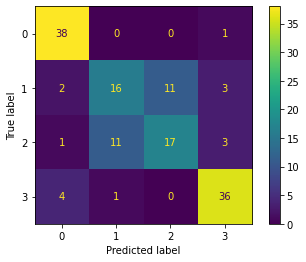

In [ ]:
fig.plot()

<AxesSubplot:>

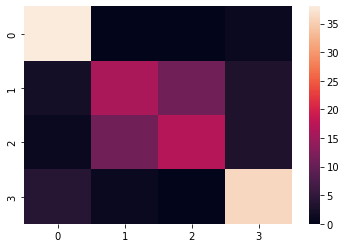

In [ ]:
sns.heatmap(cm_knn)

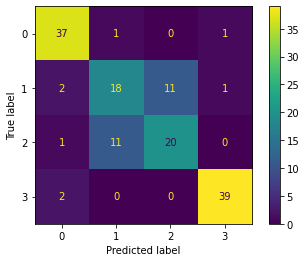

In [ ]:
cm_lrc = confusion_matrix(y_test, y_pred_lrc)
fig_lrc=ConfusionMatrixDisplay(cm_lrc,display_labels = lrc.classes_)
fig_lrc.plot()

<AxesSubplot:>

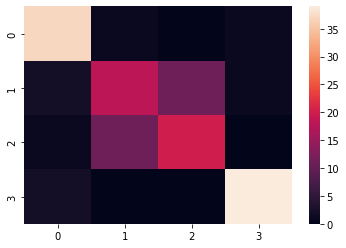

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_lrc))

In [ ]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
fig_rfc=ConfusionMatrixDisplay(cm_rfc,display_labels = rfc.classes_)

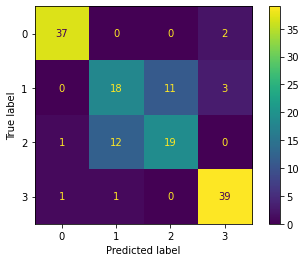

In [ ]:
fig_rfc.plot()

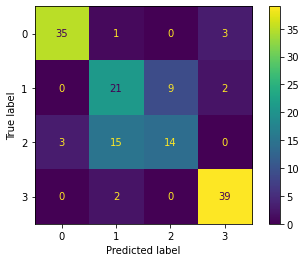

In [ ]:
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
fig_gbc=ConfusionMatrixDisplay(cm_gbc,display_labels = gbc.classes_)
fig_gbc.plot()

#SVC

SVM - SVC




In [ ]:
 from sklearn.svm import SVC
 from sklearn.model_selection import cross_val_score

In [ ]:
svc=SVC(C= 5,kernel= 'poly',degree= 5, random_state = 0 )

In [ ]:
cv_scores= cross_val_score(svc, X_new, y_train, cv=5)

In [ ]:
cv_scores

array([0.66086957, 0.6       , 0.66956522, 0.6173913 , 0.70434783])

In [ ]:
svc.fit(X_new,y_train)

SVC(C=5, degree=5, kernel='poly', random_state=0)

In [ ]:
svc.score(X_test_new, y_test)

0.6875

Plotting Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(X_test_new)

In [ ]:
cm=confusion_matrix(y_test, y_pred)

<AxesSubplot:>

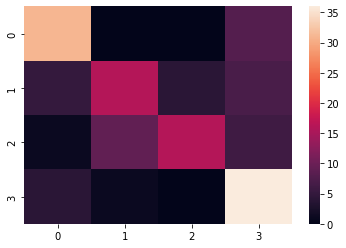

In [ ]:
sns.heatmap(cm)

#Parameter Tuning in Models

Logistic Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
lrc_train_score=[]
lrc_test_score=[]
lrc_f1_score=[]
lrc_MAE=[]
lrc_MSE=[]

In [ ]:
from sklearn.linear_model import LogisticRegression

for k in ['sag', 'saga','lbfgs']:
  lrc=LogisticRegression(multi_class='multinomial', solver=k)
  lrc.fit(X_new,y_train)
  y_pred=lrc.predict(X_test_new)
  lrc_train_score.append(lrc.score(X_new,y_train))
  lrc_test_score.append(lrc.score(X_test_new,y_test))
  lrc_f1_score.append(f1_score(y_test,y_pred,average='micro'))
  lrc_MAE.append(mean_absolute_error(y_test,y_pred))
  lrc_MSE.append(mean_squared_error(y_test,y_pred))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print(lrc_train_score)
print(lrc_test_score)
print(lrc_f1_score)
print(lrc_MAE)
print(lrc_MSE)

[0.8130511463844797, 0.8130511463844797, 0.8130511463844797]
[0.7916666666666666, 0.7986111111111112, 0.7916666666666666]
[0.7916666666666666, 0.7986111111111112, 0.7916666666666666]
[0.2638888888888889, 0.2569444444444444, 0.2638888888888889]
[0.4166666666666667, 0.4097222222222222, 0.4166666666666667]


KNN Classifier

In [ ]:
knn_train_score=[]
knn_test_score=[]
knn_f1_score=[]
knn_MAE=[]
knn_MSE=[]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=[2,5,10,12,15,18,19,20,22,25,30]
for k in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_new,y_train)
  y_pred_knn=knn.predict(X_test_new)
  knn_train_score.append(knn.score(X_new,y_train))
  knn_test_score.append(knn.score(X_test_new,y_test))
  knn_f1_score.append(f1_score(y_test,y_pred_knn,average ='micro'))
  knn_MAE.append(mean_absolute_error(y_test,y_pred_knn))
  knn_MSE.append(mean_squared_error(y_test,y_pred_knn))


In [ ]:
print(knn_train_score)
print(knn_test_score)
print(knn_f1_score)
print(knn_MAE)
print(knn_MSE)

[0.8694885361552028, 0.8236331569664903, 0.798941798941799, 0.7671957671957672, 0.7777777777777778, 0.7671957671957672, 0.7601410934744268, 0.7566137566137566, 0.7566137566137566, 0.7442680776014109, 0.7354497354497355]
[0.6666666666666666, 0.7361111111111112, 0.6944444444444444, 0.7083333333333334, 0.7152777777777778, 0.7291666666666666, 0.7430555555555556, 0.7361111111111112, 0.7222222222222222, 0.7152777777777778, 0.6944444444444444]
[0.6666666666666666, 0.7361111111111113, 0.6944444444444444, 0.7083333333333334, 0.7152777777777778, 0.7291666666666665, 0.7430555555555556, 0.7361111111111113, 0.7222222222222222, 0.7152777777777778, 0.6944444444444444]
[0.4305555555555556, 0.3819444444444444, 0.4930555555555556, 0.4791666666666667, 0.4722222222222222, 0.4652777777777778, 0.4236111111111111, 0.4444444444444444, 0.4583333333333333, 0.4583333333333333, 0.5]
[0.6944444444444444, 0.7152777777777778, 1.0069444444444444, 0.9930555555555556, 0.9861111111111112, 1.0069444444444444, 0.881944444

In [ ]:
#good score received at n=19.  0.76 train score and 0.74 f1_score

Decision Tree

In [ ]:
dtc_train_score=[]
dtc_test_score=[]
dtc_f1_score=[]
dtc_MAE=[]
dtc_MSE=[]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
max_depth=[2,3,4,5,10,12,15]
for k in max_depth:
  dtc = DecisionTreeClassifier(max_depth=k, min_samples_split=4,class_weight="balanced")
  dtc.fit(X_new,y_train)
  y_pred_dtc=dtc.predict(X_test_new)
  dtc_train_score.append(dtc.score(X_new,y_train))
  dtc_test_score.append(dtc.score(X_test_new,y_test))
  dtc_f1_score.append(f1_score(y_test,y_pred_dtc,average ='micro'))
  dtc_MAE.append(mean_absolute_error(y_test,y_pred_dtc))
  dtc_MSE.append(mean_squared_error(y_test,y_pred_dtc))

In [ ]:
print(dtc_train_score)
print(dtc_test_score)
print(dtc_f1_score)
print(dtc_MAE)
print(dtc_MSE)

[0.5634782608695652, 0.6869565217391305, 0.7286956521739131, 0.7913043478260869, 0.9617391304347827, 0.9791304347826087, 0.9843478260869565]
[0.5277777777777778, 0.7013888888888888, 0.7222222222222222, 0.7222222222222222, 0.7430555555555556, 0.7222222222222222, 0.7569444444444444]
[0.5277777777777778, 0.7013888888888888, 0.7222222222222222, 0.7222222222222222, 0.7430555555555556, 0.7222222222222222, 0.7569444444444444]
[0.9027777777777778, 0.4305555555555556, 0.4027777777777778, 0.375, 0.3472222222222222, 0.3680555555555556, 0.3333333333333333]
[2.125, 0.75, 0.7083333333333334, 0.5972222222222222, 0.5555555555555556, 0.5763888888888888, 0.5416666666666666]


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred_dtc)

<AxesSubplot:>

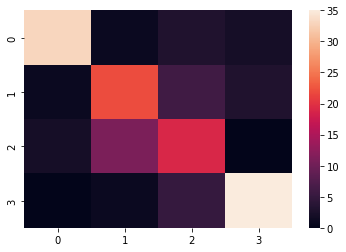

In [ ]:
sns.heatmap(cm)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
max_depth = [2,3,4,5,6,8,10]
rfc_train_score=[]
rfc_test_score=[]
rfc_f1_score=[]
rfc_MAE=[]
rfc_MSE=[]

In [ ]:
for k in max_depth:
  rfc=RandomForestClassifier(n_estimators=300, max_depth= k, random_state= 0)
  rfc.fit(X_new,y_train)
  y_pred_rfc=rfc.predict(X_test_new)
  rfc_train_score.append(rfc.score(X_new,y_train))
  rfc_test_score.append(rfc.score(X_test_new,y_test))
  rfc_f1_score.append(f1_score(y_test,y_pred_rfc,average ='micro'))
  rfc_MAE.append(mean_absolute_error(y_test,y_pred_rfc))
  rfc_MSE.append(mean_squared_error(y_test,y_pred_rfc))

In [ ]:
print(rfc_train_score)
print(rfc_test_score)
print(rfc_f1_score)
print(rfc_MAE)
print(rfc_MSE)

[0.6596119929453262, 0.7160493827160493, 0.7654320987654321, 0.8571428571428571, 0.9206349206349206, 0.9929453262786596, 1.0]
[0.6805555555555556, 0.7222222222222222, 0.7361111111111112, 0.75, 0.7708333333333334, 0.7986111111111112, 0.7777777777777778]
[0.6805555555555556, 0.7222222222222222, 0.7361111111111113, 0.75, 0.7708333333333333, 0.7986111111111112, 0.7777777777777778]
[0.4513888888888889, 0.375, 0.375, 0.3541666666666667, 0.3055555555555556, 0.2708333333333333, 0.2986111111111111]
[0.7708333333333334, 0.5972222222222222, 0.6388888888888888, 0.6041666666666666, 0.5, 0.4513888888888889, 0.4930555555555556]


Applying CV in RFClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_params={'n_estimators':[100,200,300],'max_depth':[3,4,5,6,8,10]}
gscv=GridSearchCV(RandomForestClassifier(),tree_params,cv=5)
gscv.fit(X_new,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
gscv.best_params_

{'max_depth': 6, 'n_estimators': 300}

In [ ]:
gscv.best_score_

0.742608695652174

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
learning_rate = [0.0001,0.001,0.01,0.015,0.1]
gbc_train_score=[]
gbc_test_score=[]
gbc_f1_score=[]
gbc_MAE=[]
gbc_MSE=[]

In [ ]:

for k in learning_rate:
  gbc=GradientBoostingClassifier(n_estimators= 300, learning_rate = k, random_state=0)
  gbc.fit(X_new,y_train)
  y_pred_gbc=gbc.predict(X_test_new)
  gbc_train_score.append(gbc.score(X_new,y_train))
  gbc_test_score.append(gbc.score(X_test_new,y_test))
  gbc_f1_score.append(f1_score(y_test,y_pred_gbc,average ='micro'))
  gbc_MAE.append(mean_absolute_error(y_test,y_pred_gbc))
  gbc_MSE.append(mean_squared_error(y_test,y_pred_gbc))

In [ ]:
print(gbc_train_score)
print(gbc_test_score)
print(gbc_f1_score)
print(gbc_MAE)
print(gbc_MSE)

[0.5061728395061729, 0.7619047619047619, 0.9065255731922398, 0.9559082892416225, 1.0]
[0.4305555555555556, 0.6875, 0.75, 0.7708333333333334, 0.7916666666666666]
[0.4305555555555556, 0.6875, 0.75, 0.7708333333333333, 0.7916666666666666]
[0.8819444444444444, 0.4097222222222222, 0.3472222222222222, 0.2916666666666667, 0.2708333333333333]
[1.5069444444444444, 0.6319444444444444, 0.5972222222222222, 0.4583333333333333, 0.4375]


In [ ]:
tree_params={'n_estimators':[100,200,250],'learning_rate':[0.001,0.01,0.015,0.1,0.15]}
gscv1=GridSearchCV(GradientBoostingClassifier(),tree_params,cv=5)
gscv1.fit(X_new,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.015, 0.1, 0.15],
                         'n_estimators': [100, 200, 250]})

In [ ]:
gscv1.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [ ]:
gscv1.best_score_

0.7408166433783574

Considering the best model in each category we have best scores for models with given parameters

*   Logistic Regression - score: 0.798  k='sag'
*   KNN                 - score: 0.74   k=5
*   Decision Tree       - score: 0.72   max-depth=4
*   RFC                 - score: 0.77   max-depth=4  n-estimator=300  
*   GBC                 - score: 0.77   learning_rate=0.1 n-estimator=300









The best result is shown with Logistic Regression.

#Final Model

In [ ]:
#scaled data: X_std,X_std_test,y_train,y_test
#X and y for train and test after outlier removal: X_train_1,X_test_1,y_train,y_test

In [ ]:
X_new = X_train_1
X_test_new = X_test_1

In [ ]:
from sklearn.linear_model import LogisticRegression


lrc=LogisticRegression(multi_class='multinomial', solver='saga')
lrc.fit(X_new,y_train)
y_pred_lrc=lrc.predict(X_test_new)
print("lrc_train_score:",lrc.score(X_new,y_train))
print("lrc_test_score:",lrc.score(X_test_new,y_test))
print("lrc_f1_score:",f1_score(y_test,y_pred,average='micro'))
print("lrc_MAE:",mean_absolute_error(y_test,y_pred))
print("lrc_MSE:",mean_squared_error(y_test,y_pred))

lrc_train_score: 0.8130511463844797
lrc_test_score: 0.7986111111111112
lrc_f1_score: 0.7986111111111112
lrc_MAE: 0.2569444444444444
lrc_MSE: 0.4097222222222222


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

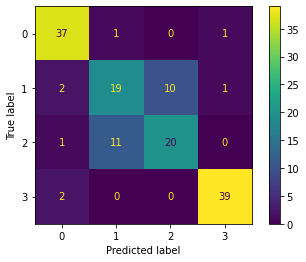

In [ ]:
cm_lrc = confusion_matrix(y_test, y_pred_lrc)
fig_lrc=ConfusionMatrixDisplay(cm_lrc,display_labels = lrc.classes_)
fig_lrc.plot()

Best score achieved :0.798